<a href="https://colab.research.google.com/github/Piaozan/29CM_Power_User/blob/main/29CM_power_user.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 준비 사항

## 필요 패키지 불러오기

In [ ]:
# 필요패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

# #코랩 한글깨짐 방지 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
pd.set_option('display.max_columns', None)

# 경고 문구
import warnings
warnings.filterwarnings(action='ignore')

# 시각화 디자인
sns.set_palette("RdBu")

# 컬럼 전체 보기
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## 파일 불러오기

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# # 3개 데이터 합치기

# event = pd.read_csv('/content/gdrive/MyDrive/final/data/commerce/sampled_events.csv')
# product = pd.read_csv('/content/gdrive/MyDrive/final/data/commerce/sampled_products.csv')
# user = pd.read_csv('/content/gdrive/MyDrive/final/data/commerce/sampled_users.csv')

# event_product = event.merge(product, on='item_no', how='left')
# commerce = event_product.merge(user, on='user_no', how='left')

# # 합친 데이터 추출, 이후 commerce 테이블 활용
# commerce.to_csv('/content/gdrive/MyDrive/final/data/commerce/commerce.csv', index=False)

In [ ]:
# 총 데이터 활용
commerce = pd.read_csv('/content/gdrive/MyDrive/final/data/commerce/commerce.csv')

# 1. 전체 개요

## (1) 컬럼 소개

- 데이터 셋 정보: 29CM 앱 이용 데이터
- 기간: 21.06.03 ~ 21.08.04(9주)
- 액티브 유저 데이터 (나이, 성별)
- 구매이력이 있는 상품 정보 (상품명, 이미지, 가격, 카테고리, 브랜드 등)
- 유저 앱 활동 로그 (이벤트 타임, 클릭/구매/장바구니/좋아요, 플랫폼 등)

In [ ]:
# total로 대체 (원본은 남기기)
total = commerce.copy()

## (2) 개요

- **주제:** 29CM 고객 구매 데이터 EDA를 통한 파워유저와 논파워유저 간의 행태 차이 분석
- **기획 의도:** CRM 마케팅 부서에게 고객 별 마케팅 전략에 인사이트를 제공
- **얻고자 하는 인사이트:**
    - 파워유저와 논파워유저의 특징
    - 파워유저와 논파워유저의 행태 차이
    - 상기 내용 바탕으로 마케팅팀에서 사용할 수 있는 유의미한 고객간 차이점 제시

# 2. EDA

## (1) 기본 데이터 알아보기

In [ ]:
total.head(2)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN,1969-04-05,F
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID,Puppy's delight short sleeve T-shirts white,9911a0e7dc8296f2fdccebb3bbbfa615,38000.0,243100100,의류,243102100,상의,243102103,티셔츠,7604.0,Wave union,1989-02-22,F


In [ ]:
# null 값 확인
total.isnull().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
item_name                         0
image_name                        0
price                             0
category1_code                    0
category1_name                    0
category2_code                    0
category2_name                    0
category3_code                    0
category3_name                    0
brand_no                        171
brand_name                      209
birth_date                   296901
gender                       664253
dtype: int64

- mobile_brand_name, mobile_model_name 같은 null 값 존재
- mobile_marketing_name 애플 보안성 문제로 인한 null 값 존재
- birth_date, gender 많은 양의 null 값 존재
- 모든 데이터 들은 추후에 처리 할 예정

In [ ]:
# info 확인
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   event_timestamp           object 
 2   event_name                object 
 3   user_no                   object 
 4   item_no                   object 
 5   device_type               object 
 6   mobile_brand_name         object 
 7   mobile_model_name         object 
 8   mobile_marketing_name     object 
 9   operating_system_version  object 
 10  country                   object 
 11  region                    object 
 12  platform                  object 
 13  item_name                 object 
 14  image_name                object 
 15  price                     float64
 16  category1_code            int64  
 17  category1_name            object 
 18  category2_code            int64  
 19  category2_name            object 
 20  category3_code          

- event_timestamp, birth_date 시간대이므로, datetime 형식으로 전환 필요

In [ ]:
# 기본 통계량 확인
total.describe()

,price,category1_code,category2_code,category3_code,brand_no
count,5.880407e+06,5.880407e+06,5.880407e+06,5.880407e+06,5.880236e+06
mean,9.465186e+04,2.442333e+08,2.442026e+08,2.442026e+08,7.254326e+03
std,1.169249e+05,2.390334e+06,2.278878e+06,2.278884e+06,4.307777e+03
min,0.000000e+00,2.341001e+08,2.341051e+08,2.341051e+08,4.410000e+02
25%,3.970000e+04,2.431001e+08,2.431021e+08,2.431021e+08,3.268000e+03
50%,6.900000e+04,2.431001e+08,2.431041e+08,2.431041e+08,6.513000e+03
75%,1.190000e+05,2.441001e+08,2.441021e+08,2.441021e+08,1.135900e+04
max,1.429800e+07,2.671001e+08,2.591031e+08,2.591031e+08,1.573700e+04


In [ ]:
total.head(2)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN,1969-04-05,F
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID,Puppy's delight short sleeve T-shirts white,9911a0e7dc8296f2fdccebb3bbbfa615,38000.0,243100100,의류,243102100,상의,243102103,티셔츠,7604.0,Wave union,1989-02-22,F


## (2) Feature 분류

- 숫자형: price
- 범주형: event_name, device_type, country, platform, item_name, category1_name, brand_name, gender ......
- 시계열: event_timestamp, birth_date

### 유저

In [ ]:
print('총 유저 수: ',total['user_no'].nunique())
print('구매 유저 수:', total[total['event_name'] == 'purchase_success']['user_no'].nunique())
print('눈팅(구매 하지 않은) 유저 수: ', total['user_no'].nunique() - total[total['event_name'] == 'purchase_success']['user_no'].nunique())

총 유저 수:  254958
구매 유저 수: 146904
눈팅(구매 하지 않은) 유저 수:  108054


### 상품

In [ ]:
print('총 상품 수: ', total['item_no'].nunique())
print('구매된 상품 수:', total[total['event_name'] == 'purchase_success']['item_no'].nunique())
print('구매되지 않은 상품 수: ', total['item_no'].nunique() - total[total['event_name'] == 'purchase_success']['item_no'].nunique())

총 상품 수:  283326
구매된 상품 수: 69498
구매되지 않은 상품 수:  213828


### 행동 이름 -> 범주형

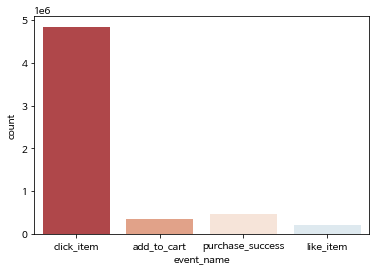

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('event_name', data=total)
plt.show()

- 클릭 수가 압도적으로 많고, 다음으로 구매 수가 많다.
- 장바구니/좋아요 수 < 구매 수  == 클릭에서 바로 구매로 전환된 것 일까?

### 카테고리(1단계) -> 범주형

In [ ]:
round(total['category1_name'].value_counts(normalize=True) * 100, 2)

의류            60.65
잡화            25.15
생활/건강          4.49
가구/인테리어        3.59
디지털/가전         2.33
화장품/미용         1.26
식품             0.81
스포츠/레저         0.75
컬처             0.56
키즈             0.19
반려동물           0.16
성년의날           0.06
홈_OLD          0.00
패션잡화_OLD       0.00
라이프스타일_OLD     0.00
뷰티_OLD         0.00
여성패션_OLD       0.00
Name: category1_name, dtype: float64

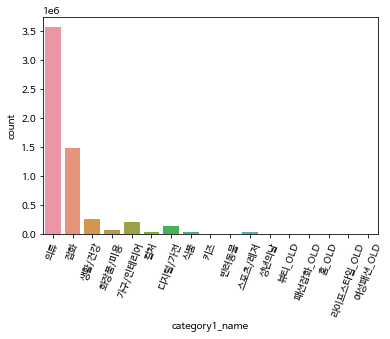

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('category1_name', data=total)
plt.xticks(rotation=70)
plt.show()

- 의류 & 잡화 상품이 유저 행동의 85% 이상을 차지한다.

In [ ]:
round(total[total['event_name'] == 'purchase_success']['category1_name'].value_counts(normalize=True) * 100, 2).head(5)

의류         50.26
잡화         24.98
생활/건강       7.33
가구/인테리어     4.04
디지털/가전      3.85
Name: category1_name, dtype: float64

- 의류 & 잡화 상품 구매 역시 전체의 75%이상을 차지하고 있다.

### 플랫폼 -> 범주형

In [ ]:
# 플랫폼 별 행동 수
round(total['platform'].value_counts(normalize=True) * 100, 2)

IOS        72.13
ANDROID    27.87
Name: platform, dtype: float64

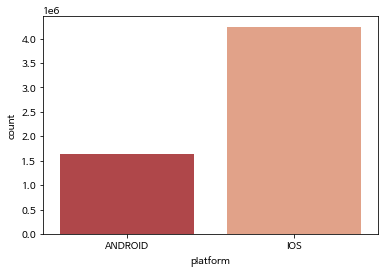

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('platform', data=total)
plt.show()

- IOS유저 : Android 유저 = 7:3

### 성별 -> 범주형

In [ ]:
# 성별 별 유저의 행동 비율
round(total['gender'].value_counts(normalize=True) * 100, 2)

F    83.9
M    16.1
Name: gender, dtype: float64

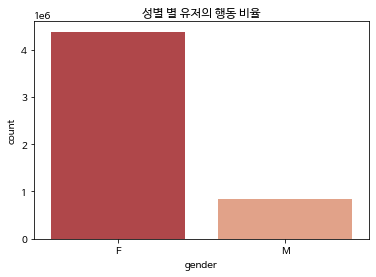

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('gender', data=total)
ax.set_title('성별 별 유저의 행동 비율')
plt.show()

- 29CM의 주요 고객은 여성이며, 남녀 행동 비율이 약 2:8이다.

### 나이 -> 범주형

- 데이터에는 유저의 생년월일이 있으므로, 이것으로 "age" 컬럼을 추가한다.
- 데이터가 2021년 6-8월 데이터이므로, 현재가 2021년인 것을 가정하고 나이 계산을 진행한다.

In [ ]:
# 출생년도
total['birth_date'] = pd.to_datetime(total['birth_date'], errors = 'coerce')

# 출생년도를 통해 나이 계산
total['age'] = 2021 - total['birth_date'].dt.year

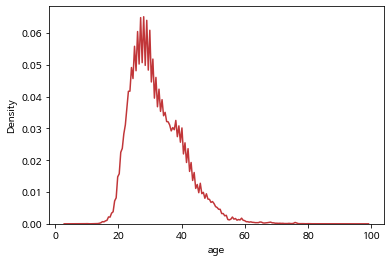

In [ ]:
# 나이 분포 확인
sns.kdeplot('age', data=total)

- 나이 분포를 확인한 결과, 나이에 따라 유저 행동 수의 차이가 크므로, 나이대로 기준을 삼아 분류

In [ ]:
# 나이대
total['나이대'] = np.where(total['age'] < 10, '0-9세',
                        np.where(total['age'] < 20, '10대',
                        np.where(total['age'] < 30, '20대',
                        np.where(total['age'] < 40, '30대',
                        np.where(total['age'] < 50, '40대',
                        np.where(total['age'] < 60, '50대',
                        np.where(total['age'] < 70, '60대',
                        np.where(total['age'] < 80, '70대',
                        np.where(total['age'] < 90, '80대','90대')))))))))

In [ ]:
# 나이대 별 유저의 행동 비율
round(total['나이대'].value_counts(normalize=True) * 100, 2)

20대     40.53
30대     34.96
40대     14.17
90대      5.71
50대      2.77
10대      1.29
60대      0.44
70대      0.12
80대      0.01
0-9세     0.00
Name: 나이대, dtype: float64

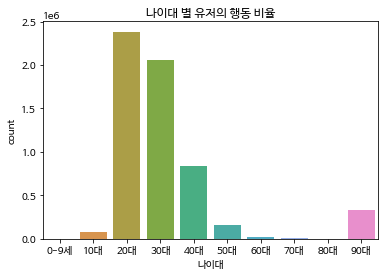

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('나이대', data=total,order=['0-9세','10대','20대','30대','40대','50대','60대','70대','80대','90대'])
ax.set_title('나이대 별 유저의 행동 비율')
plt.show()

- 20,30,40대가 29CM의 주요 고객층이다.
- 0-9세, 70대,80대는 정말 본인들이 구매를 진행한 것일까?
- 90대는 전체의 5.7%의 비중을 차지하는데, 유저들의 입력 오류일 가능성이 크므로, 향후 처리가 필요해보인다.

- 나이대 별로 상품 종류 및 브랜드 등 선호가 있는지 확인하여, 나이 분류를 나이대 기준으로 한 것이 정확한지 알아보자
- 밑의 차트는 나이대 별로 제일 행동을 많이 취한 카테고리 3단계 별로 나열하였다.
- 나이대는 이상이 있는 90대를 제외한, TOP4 20-50대를 기준으로 나눴다.

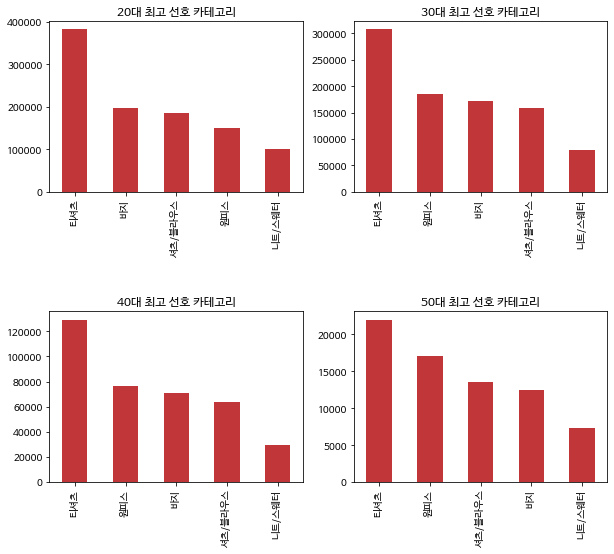

In [ ]:
f,ax = plt.subplots(2,2, figsize=(10,8))

# 나이대 vs 카테고리 3
total[total['나이대'] == '20대']['category3_name'].value_counts().head(5).plot.bar(ax=ax[0,0])
ax[0,0].set_title('20대 최고 선호 카테고리')

total[total['나이대'] == '30대']['category3_name'].value_counts().head(5).plot.bar(ax=ax[0,1])
ax[0,1].set_title('30대 최고 선호 카테고리')

total[total['나이대'] == '40대']['category3_name'].value_counts().head(5).plot.bar(ax=ax[1,0])
ax[1,0].set_title('40대 최고 선호 카테고리')

total[total['나이대'] == '50대']['category3_name'].value_counts().head(5).plot.bar(ax=ax[1,1])
ax[1,1].set_title('50대 최고 선호 카테고리')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

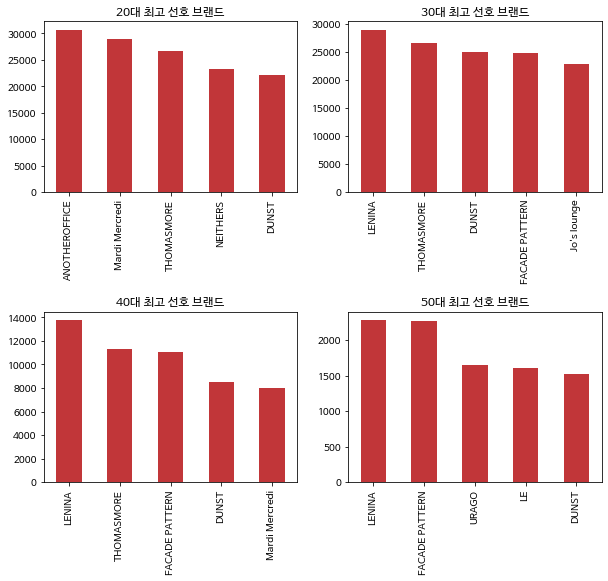

In [ ]:
f,ax = plt.subplots(2,2, figsize=(10,8))

# 나이대 vs 브랜드
total[total['나이대'] == '20대']['brand_name'].value_counts().head(5).plot.bar(ax=ax[0,0])
ax[0,0].set_title('20대 최고 선호 브랜드')

total[total['나이대'] == '30대']['brand_name'].value_counts().head(5).plot.bar(ax=ax[0,1])
ax[0,1].set_title('30대 최고 선호 브랜드')

total[total['나이대'] == '40대']['brand_name'].value_counts().head(5).plot.bar(ax=ax[1,0])
ax[1,0].set_title('40대 최고 선호 브랜드')

total[total['나이대'] == '50대']['brand_name'].value_counts().head(5).plot.bar(ax=ax[1,1])
ax[1,1].set_title('50대 최고 선호 브랜드')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

- 나이대 기준으로 카테고리 3단계 및 브랜드 별로 제일 행동을 많이 취한 TOP5를 알아보았다.
- 이를 통해 나이대 별로 상품 종류 및 브랜드의 큰 차이를 띄는 것을 확인 할 수 있었고, 이를 통해 나이대를 기준으로 나이를 분류한 것에 큰 문제가 없어 보인다.

## (3) 데이터 전처리

### event_timestamp

In [ ]:
# event_timestamp => datetime 타입으로 변환
total['event_timestamp'] = pd.to_datetime(total['event_timestamp'], errors = 'coerce')

# event_year은 모두 2021년이라 삭제
# event_time 기준으로 새로운 시간 컬럼 생성
total['event_month'] = total['event_timestamp'].dt.month
total['event_day'] = total['event_timestamp'].dt.day
total['event_weekday'] = total['event_timestamp'].dt.dayofweek
total['event_hour'] = total['event_timestamp'].dt.hour
total['event_minute'] = total['event_timestamp'].dt.minute
total['event_timestamp'] = total['event_timestamp'].dt.date

In [ ]:
# 데이터 타입 : object -> datetime
total['event_timestamp'] = pd.to_datetime(total['event_timestamp'])

# 날짜 기준 (6.6 ~ 7.31)
total = total[(total['event_timestamp'] >= '2021-06-06') & (total['event_timestamp'] <= '2021-07-31')]

- 본 데이터는 전체 기간이 21.06.03~21.08.04(9주)인 데이터이지만, 정확한 개월로 데이터가 나뉘어 있지 않다.
- 그러므로 21.06.06~21.07.31(8주) 기간의 데이터인 2달의 시간을 기준으로 데이터 분석을 진행하려고 한다.

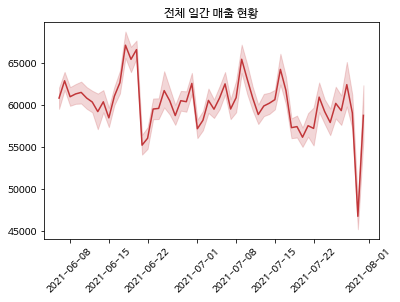

In [ ]:
# 전체 일간 매출 현황
sns.lineplot('event_timestamp','price', data=total[total['event_name'] == 'purchase_success'])
plt.title('전체 일간 매출 현황')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()

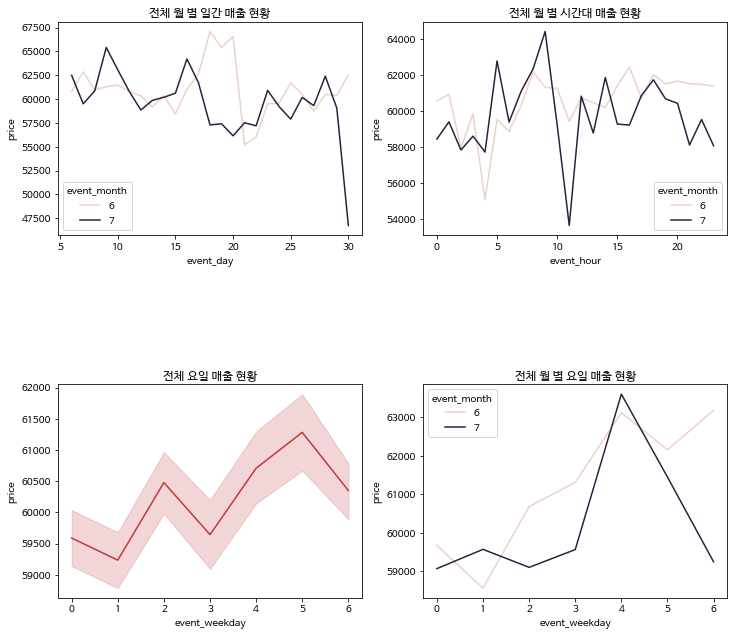

In [ ]:
f,ax = plt.subplots(2,2, figsize=(12,10))

# 전체 월 별 일간 매출 현황
# 동기간의 일 별을 비교하기 위해 6/6~6/30 vs 7/6~7/30 로 비교 진행
sns.lineplot('event_day','price', data=total[(((total['event_timestamp'] >= '2021-06-06') & (total['event_timestamp'] <= '2021-06-30')) |
                                                  ((total['event_timestamp'] >= '2021-07-06') & (total['event_timestamp'] <= '2021-07-30')))&
                                                  (total['event_name'] == 'purchase_success')], hue='event_month', ci=None, ax=ax[0,0])
ax[0,0].set_title('전체 월 별 일간 매출 현황')

# 전체 월 별 시간대 매출 현황
# 동기간의 일 별을 비교하기 위해 6/6~6/30 vs 7/6~7/30 로 비교 진행
sns.lineplot('event_hour','price', data=total[(((total['event_timestamp'] >= '2021-06-06') & (total['event_timestamp'] <= '2021-06-30')) |
                                                  ((total['event_timestamp'] >= '2021-07-06') & (total['event_timestamp'] <= '2021-07-30')))&
                                                  (total['event_name'] == 'purchase_success')], hue='event_month', ci=None, ax=ax[0,1])
ax[0,1].set_title('전체 월 별 시간대 매출 현황')

# 전체 요일 매출 현황
sns.lineplot('event_weekday','price', data=total[total['event_name'] == 'purchase_success'], ax=ax[1,0])
ax[1,0].set_title('전체 요일 매출 현황')

# 전체 월 별 요일 매출 현황
# 동기간의 요일을 비교하기 위해 6/6~6/26 vs 7/4~7/24 로 비교하여, 총 3주의 요일 개수까지 맞추어 비교 진행
sns.lineplot('event_weekday','price', data=total[(((total['event_timestamp'] >= '2021-06-06') & (total['event_timestamp'] <= '2021-06-26')) |
                                                  ((total['event_timestamp'] >= '2021-07-04') & (total['event_timestamp'] <= '2021-07-24')))&
                                                  (total['event_name'] == 'purchase_success')],ax=ax[1,1], hue='event_month', ci=None)
ax[1,1].set_title('전체 월 별 요일 매출 현황')


plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.7)
plt.show()

## (4) 2개 이상 컬럼 비교

#### 플랫폼 & 성별/ 플랫폼 & 나이대

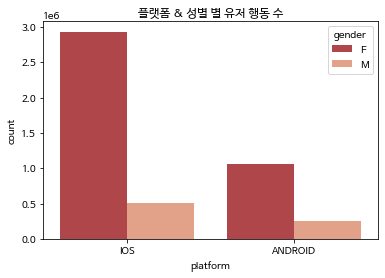

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('platform', hue='gender', data=total)
ax.set_title('플랫폼 & 성별 별 유저 행동 수')
plt.show()

- 29CM 주요 유저인 '여성'의 IOS 이용비율이 압도적으로 높음

- 앞서 살펴본 것과 같이 90대의 나이대는 오류가 있는 데이터이며, 이를 예측해서 다른 값으로 변경하기에는 개인 신상의 대한 정보가 매우 적으므로, 전환하였을 때에, 전체적인 데이터에 큰 영향을 줄 수 있다.
- **그리하여, 본 분석은 90대를 제외한 거의 전체를 차지하는 20-50대의 행동 패턴을 더욱 유심히 관찰하고자 한다.**

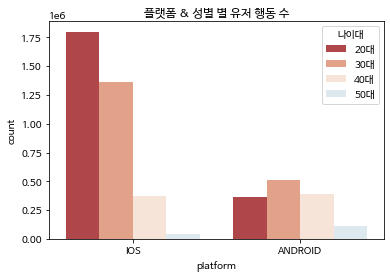

In [ ]:
# 나이대 20-50대만 추출
age_total = total[((total['나이대'] == '20대') |
                   (total['나이대'] == '30대') |
                   (total['나이대'] == '40대') |
                   (total['나이대'] == '50대'))]

# 20-50대 행동만 시각화
f,ax = plt.subplots(1,1)
sns.countplot('platform', hue='나이대', data=age_total)
ax.set_title('플랫폼 & 성별 별 유저 행동 수')
plt.show()

- 20-30대에서 IOS 이용자가 매우 많다
- 반면에, 안드로이드는 20-40대 차이가 크지 않다.
- 40-50대는 오히려 안드로이드 이용자가 IOS 보다 많다



=> **전반적으로 고려했을 때, 29CM의 매우 중요한 고객 IOS를 사용하는 20~30대 여성**

# 3. 주제 선정 이유

- 전체적인 EDA를 통해, 유저들의 데모그래픽(성, 연령 등)에 따라 행태의 차이가 있음을 발견하였다.
- 분명, 29CM의 매출에 큰 영향을 주는 특정 유저군이 존재한다.
- **그렇다면, 29CM의 어떤 유저군이 캐시카우일까?**
- **캐시카우를 알아내고, 이들을 대상으로 진행하는 기획에 집중하자**

## (1) 29CM의 핵심 고객 정의

- **29CM의 멤버십 등급**
    - **VIP**
        - 최근 6개월간 구매금액: 50만 원 이상
        - 최근 6개월간 1만 원 이상 구매횟수: 10회 이상
    - **RED**
        - 최근 6개월간 구매금액: 30만 원 이상, 50만 원 미만
        - 최근 6개월간 1만 원 이상 구매횟수: 5회 이상, 10회 미만
    - **ORANGE**
        - 최근 6개월간 구매금액: 10만 원 이상, 30만 원 미만
        - 최근 6개월간 1만 원 이상 구매횟수: 1회 이상, 5회 미만
    - **YELLOW**
        - 최근 6개월간 구매금액: 6개월 이내 재구매 경험이 없는 고객
    - **GREEN**
        - 최근 6개월간 구매금액: 신규 가입 회원 전용

- **29CM의 핵심 고객을 선정하자**
- 29CM VIP등급을 참고하여, 6개월간 기준을 2개월로 환산하여, 이를 핵심 고객인 **"파워유저"**로 정의한다.

    - **파워유저**
        - 2개월간 구매금액: 166,000원 이상
        - 2개월간 1만원 이상 구매횟수: 3회 이상

## (2) 파워유저 & 논파워유저 분류

### 구매자 & 비구매자 분류

- 파워유저의 제일 전제 조건은 구매를 했다는 것이다.
- 그러므로, 우선적으로 유저가 2개월 동안의 구매 여부를 먼저 알아보아야 한다.

In [ ]:
# 구매자 리스트 (중복 없음)
buyer_list = total[total['event_name'] == 'purchase_success'].drop_duplicates(['user_no'], keep='first')

# 구매자이면 1, 아니면 NaN
buyer_list['buyer'] = 1

buyer_list = buyer_list[['user_no','buyer']]

In [ ]:
# 구매자, 비구매자 구분 : 'buyer' 구매자 1, 비구매자 0
total = total.merge(buyer_list, on='user_no', how='left')

total['buyer'].fillna(0, inplace=True)

In [ ]:
# 필요없는 컬럼 삭제
total.drop(['mobile_model_name','mobile_marketing_name','operating_system_version','image_name','category1_code',
            'category2_code','category3_code','brand_no','event_minute','age','birth_date'], axis=1, inplace=True)

In [ ]:
total.head(2)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,country,region,platform,item_name,price,category1_name,category2_name,category3_name,brand_name,gender,나이대,event_month,event_day,event_weekday,event_hour,buyer
0,5240d1b731949382c749c79db207b2fa,2021-06-06,click_item,j2PG6ak1chv+aTkyNM3JzA==,JdwoJ4a/Z2YK5nKCKWUiyw==,mobile,Apple,South Korea,Seoul,IOS,WOOL SILK CROP JACKET - SEAL BROWN,135000.0,의류,아우터,재킷,MORE OR LESS,F,20대,6,6,6,0,0.0
1,5ae2c24c1c3e9dc228846c772cfbbbdc,2021-06-06,click_item,tBR8q7ZrRkJwO88bCX6aKA==,V9vAu4jSKMu64NY9zU155Q==,mobile,Apple,South Korea,Seoul,IOS,cl half pants (bone),117000.0,의류,하의,바지,MOIA,F,20대,6,6,6,0,1.0


### 구매자 중에서 파워유저 & 논파워유저 분류

- 우선, 구매자 중에서, 파워유저의 기준으로 파워유저와 논파워유저를 분류한다.

In [ ]:
# 2개월간의 구매자 수
print('2개월간 29CM 구매자의 수: ', total[total['buyer'] == 1]['user_no'].nunique())

2개월간 29CM 구매자의 수:  138279


In [ ]:
# 구매자가 상품을 살때의 행동
user = total[(total['buyer'] == 1) & (total['event_name'] == 'purchase_success')]

# 구매자 기준 구매 상품 개수 (item_no)
user_no = user.groupby(['user_no'])['item_no'].count().reset_index().sort_values('item_no', ascending=False)

# 모든 구매자에게 1을 부여 (추후, 유저 비율을 전체 유저와 비교할 때 쓰일 예정) (user_cnt)
user_no['user_cnt'] = 1

# 구매자 기준 구매 금액 랭킹 (price)
user_price = user.groupby(['user_no'])['price'].sum().reset_index().sort_values('price', ascending=False)

# 데이터 합치기
user_total = user_no.merge(user_price, on='user_no', how='left')

In [ ]:
#  파워유저 기준 정하기
#  2개월간 구매금액: 166,000원 이상
#  2개월간 1만원 이상 구매횟수: 3회 이상

# 파워 유저 (user_vip로 명명)
user_vip = user_total[(( user_total['item_no'] >= 3 ) & ((user_total['price'] / user_total['item_no']) >= 10000))| ( user_total['price'] >= 166000 )]
user_vip = user_vip.sort_values(['price','item_no'], ascending=False)

# 전체 유저 데이터에 합치고, 다시 중복 유저 삭제
user_total = user_vip.append(user_total)
user_total = user_total.drop_duplicates('user_no', keep='first')

# 구매자 중에서 논 파워 유저 (user_normal로 명명)
user_normal = user_total[59525:]
user_normal = user_normal.sort_values(['price','item_no'], ascending=False)


# user_vip + user_normal 합치기 = (구매자 중에서 파워유저, 논파워유저가 구분된 전체 유저)
user_total = user_vip.append(user_normal)

### 비구매자 => 논파워유저

- 비구매자는 무조건 논파워유저이므로, 위의 테이블처럼 형태만 변형해준다.
- 비구매자 기준으로 컬럼에 똑같이 부여
    - 구매 상품 수(item_no) = 0
    - 유저(user_cnt) = 1
    - 구매 금액(price) = 0
    - 파워유저 유무(power_user) = 0

In [ ]:
# 비구매자 user_no
unbuyer = total[(total['buyer'] == 0)]

unbuyer = unbuyer.groupby(['user_no'])['item_no'].count().reset_index()
unbuyer['item_no'] = 0
unbuyer['user_cnt'] = 1
unbuyer['price'] = 0

# 구매자 & 비구매자 합치기
user_total = user_total.append(unbuyer)
user_total

,user_no,item_no,user_cnt,price
0,b2xZVfUtjyGsZckO7j6zkg==,246,1,28841100.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,1,22966700.0
2324,pywOPeCTmJKudBVHC1/5iw==,15,1,11035900.0
6,8j/l4DjsSqXcIR9r5GAmLQ==,115,1,10068900.0
37379,tCbVorRR1nnG7W2rSzxZNQ==,3,1,10008000.0
...,...,...,...,...
105588,zzrlop3HrqxAgIT0VJ9wRg==,0,1,0.0
105589,zzwOfX9q6MNyni9Ff8Ws6A==,0,1,0.0
105590,zzwQnhNQeYnzcsjywnIh3g==,0,1,0.0
105591,zzxlG1wzPCGvsW0SlOleDg==,0,1,0.0


In [ ]:
# 전체 유저의 수
total['user_no'].nunique()

243872

- (파워유저, 논파워유저를 나눈)user_total의 수와, 전체 유저의 수를 살펴보면 동일하기에, 분류에서는 문제가 없음을 알 수 있다.

### 파워유저가 전체유저에서의 비율 계산

- 파워유저 & 논파워유저의 각 비율들을 계산하여 인사이트를 얻고자 한다.
- **유저 수 누적 비율** => 파워유저가 전체유저에서의 비율
- **유저 구매 금액 누적 비율** => 파워유저 구매금액이 전체 매출에서의 비율
- **유저 구매 상품 개수 누적 비율** => 파워유저 상품 구매 개수가 전체 판매 개수에서의 비율

In [ ]:
# 유저 수 누적 비율
user_total['user_cnt_cum'] =  user_total['user_cnt'].cumsum()
user_total['user_per_percent'] = user_total['user_cnt'] / len(user_total) * 100
user_total['user_per_percent_cum'] = user_total['user_per_percent'].cumsum()

# 유저 구매 금액 누적 비율
user_total['price_cum'] = user_total['price'].cumsum()
user_total['price_per_percent'] = user_total['price'] / sum(user_total['price']) * 100
user_total['price_per_percent_cum'] = user_total['price_per_percent'].cumsum()

# 유저 구매 상품 개수 누적 비율
user_total['item_no_cum'] = user_total['item_no'].cumsum()
user_total['item_per_percent'] = user_total['item_no'] / sum(user_total['item_no']) * 100
user_total['item_per_percent_cum'] = user_total['item_per_percent'].cumsum()

# 필요없는 컬럼 삭제
user_total = user_total.drop(['user_cnt','item_per_percent','user_cnt_cum','user_per_percent','item_no_cum','price_cum','price_per_percent'], axis=1)

In [ ]:
# 전체 유저 순서 정렬
user_total.reset_index(drop=True, inplace=True)

# 파워 유저 & 논 파워 유저
user_vip = user_total[:59525]
user_normal = user_total[59525:]

# 파워 유저 & 논 파워 유저(구매자 & 비구매자 포함)
user_vip['power_user'] = 1

user_total = user_total.merge(user_vip, on=['user_no', 'item_no', 'price', 'user_per_percent_cum',
       'price_per_percent_cum', 'item_per_percent_cum'], how='left')

user_total['power_user'].fillna(0, inplace=True)

In [ ]:
# 파워 유저가 전체 29CM 미치는 영향 확인
user_total[user_total['power_user'] == 1]

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.000410,0.113023,0.057958,1.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.000820,0.203025,0.105785,1.0
2,pywOPeCTmJKudBVHC1/5iw==,15,11035900.0,0.001230,0.246273,0.109319,1.0
3,8j/l4DjsSqXcIR9r5GAmLQ==,115,10068900.0,0.001640,0.285731,0.136414,1.0
4,tCbVorRR1nnG7W2rSzxZNQ==,3,10008000.0,0.002050,0.324950,0.137121,1.0
...,...,...,...,...,...,...,...
59520,DyasvMcma5FbF2AHHu+ubw==,3,30000.0,24.406656,80.056593,74.633167,1.0
59521,2y/T4u1hI1U5+ww0mqLdnA==,3,30000.0,24.407066,80.056711,74.633874,1.0
59522,I56mmeC+DT7GueHwbOVeow==,3,30000.0,24.407476,80.056828,74.634581,1.0
59523,7/PpFKdDqzuxcluFxAryyQ==,3,30000.0,24.407886,80.056946,74.635288,1.0


- user_per_percent_cum : 전체 유저 수에서 파워유저의 비율
    - 전체유저의 약 **24%는 파워유저** 이다.
- price_per_percent_cum : 전체 매출에서 파워유저가 차지한 비율
    - 전체의 약 **75%의 매출**은 **파워유저**가 담당하였다.
- item_per_percent_cum : 전체 판매 상품 개수에서 파워유저가 구매한 상품의 비율
    - 전체 판매한 약 **76%의 상품**은 **파워유저**가 구매하였다.


- **즉, 약 24%의 유저가 전체 75%의 매출을 담당하고 있다.**
- **"파워유저"에서 "파레토의 법칙"이 보인다.**
- **그러므로, 29CM은 이 파워유저의 특징을 파악하고, 지속적으로 파워유저를 타겟팅하고 유지하는 것이 이익 창출에 큰 도움을 줄 것으로 보인다.**



# 4. 파워유저 vs 논파워유저

## (1) 데이터 전처리

- 더욱 자세하게 비교하기 위해, total에서 살펴보기로 하자.
- 이전에 power_user를 구분지을 수 있게 전처리 진행

In [ ]:
# 필요없는 컬럼 제거
user_cum = user_total.drop(['user_per_percent_cum','price_per_percent_cum','item_per_percent_cum'], axis=1)
user_cum.columns = ['user_no','item_per_cnt','total_per_price','power_user']


In [ ]:
# total & user_cum merge, final로 명명
final = total.merge(user_cum, on='user_no', how='left')

In [ ]:
# final 유저가 제대로 합쳐졌는지 user_no null값 확인
final['user_no'].isnull().sum()

0

In [ ]:
final.head(2)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,country,region,platform,item_name,price,category1_name,category2_name,category3_name,brand_name,gender,나이대,event_month,event_day,event_weekday,event_hour,buyer,item_per_cnt,total_per_price,power_user
0,5240d1b731949382c749c79db207b2fa,2021-06-06,click_item,j2PG6ak1chv+aTkyNM3JzA==,JdwoJ4a/Z2YK5nKCKWUiyw==,mobile,Apple,South Korea,Seoul,IOS,WOOL SILK CROP JACKET - SEAL BROWN,135000.0,의류,아우터,재킷,MORE OR LESS,F,20대,6,6,6,0,0.0,0,0.0,0.0
1,5ae2c24c1c3e9dc228846c772cfbbbdc,2021-06-06,click_item,tBR8q7ZrRkJwO88bCX6aKA==,V9vAu4jSKMu64NY9zU155Q==,mobile,Apple,South Korea,Seoul,IOS,cl half pants (bone),117000.0,의류,하의,바지,MOIA,F,20대,6,6,6,0,1.0,1,128000.0,0.0


## (2) 유저 별 각종 행동 횟수 계산

- 각 유저가 파워유저, 논파워유저로 나뉘어 있는만큼, 그들의 행동 패턴에는 큰 차이가 있을 것이다.
- 그래서 각 유저의 event, 데모그래픽(성별, 나이, 지역 등), 카테고리1의 구매 횟수, 요일 별 구매 횟수 등등 데이터로 어떠한 차이가 있는지 알아보고자 한다.

#### event

In [ ]:
# 각 유저 별 총 클릭 횟수
click_cnt = final[final['event_name'] == 'click_item'].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'click_cnt'})

# 각 유저 별 총 장바구니 횟수
cart_cnt = final[final['event_name'] == 'add_to_cart'].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'cart_cnt'})

# 각 유저 별 총 좋아요 횟수
like_cnt = final[final['event_name'] == 'like_item'].groupby(['user_no'])['item_no'].count().reset_index().rename(columns = {'item_no' : 'like_cnt'})

In [ ]:
click_cnt

,user_no,click_cnt
0,+++T9c17sr6wEYOy9UFv3w==,2
1,+++aQH5NnhiU/9qECKk3uQ==,49
2,++0bwiYVJ/TAsCpxI4UCuw==,50
3,++292nTvV+bCI1Diuw96GA==,1
4,++2b+ESK8hAPty/PmYpJCA==,3
...,...,...
193130,zzwQnhNQeYnzcsjywnIh3g==,3
193131,zzwYai1YDr0JZQwaTqc0mQ==,7
193132,zzwxh/ZL9TPJOWZHLMvnDQ==,11
193133,zzxlG1wzPCGvsW0SlOleDg==,1


In [ ]:
# 행동 패턴 테이블 합치기 (with user_total)
user_total = user_total.merge(click_cnt, on='user_no', how='left')
user_total = user_total.merge(cart_cnt, on='user_no', how='left')
user_total = user_total.merge(like_cnt, on='user_no', how='left')

In [ ]:
user_total

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user,click_cnt,cart_cnt,like_cnt
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057958,1.0,7534.0,NaN,NaN
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.00082,0.203025,0.105785,1.0,325.0,105.0,NaN
2,pywOPeCTmJKudBVHC1/5iw==,15,11035900.0,0.00123,0.246273,0.109319,1.0,55.0,NaN,NaN
3,8j/l4DjsSqXcIR9r5GAmLQ==,115,10068900.0,0.00164,0.285731,0.136414,1.0,119.0,265.0,NaN
4,tCbVorRR1nnG7W2rSzxZNQ==,3,10008000.0,0.00205,0.324950,0.137121,1.0,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
243867,zzrlop3HrqxAgIT0VJ9wRg==,0,0.0,99.99836,100.000000,100.000000,0.0,1.0,NaN,NaN
243868,zzwOfX9q6MNyni9Ff8Ws6A==,0,0.0,99.99877,100.000000,100.000000,0.0,16.0,NaN,NaN
243869,zzwQnhNQeYnzcsjywnIh3g==,0,0.0,99.99918,100.000000,100.000000,0.0,3.0,NaN,NaN
243870,zzxlG1wzPCGvsW0SlOleDg==,0,0.0,99.99959,100.000000,100.000000,0.0,1.0,NaN,NaN


In [ ]:
# 행동 패턴 결측치 정리
user_total.fillna(0, inplace=True)
user_total.isnull().sum().sum()

0

#### 데모그래픽

In [ ]:
# 기타 인적 사항 테이블 만들기
user_info = final[['user_no','buyer','mobile_brand_name','region','platform','gender','나이대']]
user_info.drop_duplicates('user_no', keep='first', inplace=True)

In [ ]:
# 인적 사항 user_total 테이블과 합치기
user_total = user_total.merge(user_info, on='user_no', how='left')
user_total.head(2)

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user,click_cnt,cart_cnt,like_cnt,buyer,mobile_brand_name,region,platform,gender,나이대
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057958,1.0,7534.0,0.0,0.0,1.0,Apple,Chungcheongnam-do,IOS,F,40대
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.00082,0.203025,0.105785,1.0,325.0,105.0,0.0,1.0,Samsung,Seoul,ANDROID,F,40대


#### 카테고리1 (구매 횟수)

In [ ]:
final['category1_name'].value_counts()

의류            3255145
잡화            1349863
생활/건강          234897
가구/인테리어        190674
디지털/가전         123827
화장품/미용          66095
식품              42477
스포츠/레저          39716
컬처              29803
키즈              10097
반려동물             8447
성년의날             3184
홈_OLD             220
패션잡화_OLD           25
라이프스타일_OLD         13
뷰티_OLD              3
여성패션_OLD            3
Name: category1_name, dtype: int64

- OLD 관련된 제품은 갯수가 너무 적으므로, 분석이 불가

In [ ]:
# 전체 유저no
all_user_no = final[['user_no']]

# 의류 구매자 테이블
clothes_cnt = final[(final['category1_name'] == '의류') & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : '의류'})

# 전체 유저no & 의류 구매자 테이블 합치기
category_p_cnt = all_user_no.merge(clothes_cnt,on='user_no', how='left')

In [ ]:
# 각 유저 카테고리 별 구매 개수 테이블
for category in final['category1_name'].unique()[1:-5]:
    category_cnt =  final[(final['category1_name'] == category) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : category})
    category_p_cnt = category_p_cnt.merge(category_cnt, on='user_no', how='left')

# 비구매자 결측치 0으로 대체
category_p_cnt.fillna(0, inplace=True)
# 중복 유저 no 제거
category_p_cnt.drop_duplicates('user_no', keep='first', inplace=True)

In [ ]:
# (2개월간) 각 유저가 구매한 카테고리 수
category_p_cnt.head(1)

,user_no,의류,생활/건강,스포츠/레저,잡화,화장품/미용,가구/인테리어,컬처,디지털/가전,식품,키즈,반려동물,성년의날
0,j2PG6ak1chv+aTkyNM3JzA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# user_total과 카테고리 별 구매 개수 테이블 합치기
user_total = user_total.merge(category_p_cnt, on='user_no', how='left')

#### 요일 (구매 횟수)

In [ ]:
# 전체 유저no
all_user_no = final[['user_no']]

# 일요일 구매자 테이블
sunday_cnt = final[(final['event_weekday'] == 6) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : '일요일'})

# 전체 유저no & 일요일 구매자 테이블 합치기
week_p_cnt = all_user_no.merge(sunday_cnt,on='user_no', how='left')

In [ ]:
# 각 유저 요일 별 구매 개수 테이블
for week in final['event_weekday'].unique()[1:]:
    week_cnt =  final[(final['event_weekday'] == week) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : week})
    week_p_cnt = week_p_cnt.merge(week_cnt, on='user_no', how='left')

# 비구매자 결측치 0으로 대체
week_p_cnt.fillna(0, inplace=True)
# 중복 유저 no 제거
week_p_cnt.drop_duplicates('user_no', keep='first', inplace=True)
# 요일 이름 바꾸기
week_p_cnt.columns = ['user_no','일요일','월요일','화요일','수요일','목요일','금요일','토요일']

In [ ]:
# user_total과 요일 별 구매 개수 테이블 합치기

user_total = user_total.merge(week_p_cnt, on='user_no', how='left')

In [ ]:
user_total.head(1)

,user_no,item_no,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user,click_cnt,cart_cnt,like_cnt,buyer,mobile_brand_name,region,platform,gender,나이대,의류,생활/건강,스포츠/레저,잡화,화장품/미용,가구/인테리어,컬처,디지털/가전,식품,키즈,반려동물,성년의날,일요일,월요일,화요일,수요일,목요일,금요일,토요일
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057958,1.0,7534.0,0.0,0.0,1.0,Apple,Chungcheongnam-do,IOS,F,40대,238.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,23.0,42.0,31.0,37.0,34.0,50.0


#### 객단가

In [ ]:
# 객단가 item_per_price 계산
user_total['item_per_price'] = user_total['price'] / user_total['item_no']
user_total['item_per_price'].fillna(0, inplace=True)

# 상품 구매 갯수 이름 변경, item_no => buy_cnt
user_total.rename(columns = {'item_no' : 'buy_cnt'}, inplace=True)

#### 시간대

In [ ]:
# 전체 유저no
all_user_no = final[['user_no']]

# 0시 구매자 테이블
zero_cnt = final[(final['event_hour'] == 0) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : '0시'})

# 전체 유저no & 0시 구매자 테이블 합치기
hour_p_cnt = all_user_no.merge(zero_cnt,on='user_no', how='left')

In [ ]:
# 각 유저 시간대 별 구매 개수 테이블
for hour in final['event_hour'].unique()[1:]:
    hour_cnt =  final[(final['event_hour'] == hour) & (final['event_name'] == 'purchase_success')].groupby(['user_no'])['item_no'].count().reset_index().rename(columns={'item_no' : hour})
    hour_p_cnt = hour_p_cnt.merge(hour_cnt, on='user_no', how='left')

# 비구매자 결측치 0으로 대체
hour_p_cnt.fillna(0, inplace=True)
# 중복 유저 no 제거
hour_p_cnt.drop_duplicates('user_no', keep='first', inplace=True)
# 시간대 이름 바꾸기
hour_p_cnt.columns = ['user_no','0시','1시','2시','3시','4시','5시','6시','7시','8시','9시','10시','11시','12시','13시','14시','15시','16시','17시','18시','19시','20시','21시','22시','23시']

In [ ]:
# user_total과 시간대 별 구매 개수 테이블 합치기
user_total = user_total.merge(hour_p_cnt, on='user_no', how='left')

In [ ]:
user_total.head(3)

## (3) Power user & Non power user 행동 차이

In [ ]:
# 보기 쉽게 필요한 value를 한글로 변경
user_total['buyer'] = np.where(user_total['buyer'] == 1, '구매자','비구매자')
user_total['power_user'] = np.where(user_total['power_user'] == 1, '파워유저','논파워유저')

In [ ]:
user_total.head(2)

,user_no,buy_cnt,price,user_per_percent_cum,price_per_percent_cum,item_per_percent_cum,power_user,click_cnt,cart_cnt,like_cnt,buyer,mobile_brand_name,region,platform,gender,나이대,의류,생활/건강,스포츠/레저,잡화,화장품/미용,가구/인테리어,컬처,디지털/가전,식품,키즈,반려동물,성년의날,일요일,월요일,화요일,수요일,목요일,금요일,토요일,item_per_price,0시,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,0.00041,0.113023,0.057958,파워유저,7534.0,0.0,0.0,구매자,Apple,Chungcheongnam-do,IOS,F,40대,238.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,23.0,42.0,31.0,37.0,34.0,50.0,117240.243902,7.0,8.0,5.0,0.0,0.0,0.0,10.0,6.0,12.0,13.0,12.0,13.0,10.0,14.0,12.0,15.0,19.0,19.0,18.0,8.0,17.0,6.0,15.0,7.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,0.00082,0.203025,0.105785,파워유저,325.0,105.0,0.0,구매자,Samsung,Seoul,ANDROID,F,40대,171.0,9.0,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,13.0,113136.453202,13.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0


### event & 구매 금액

#### 구매자 & 비구매자 포함

In [ ]:
# 행동 패턴

action = np.round(user_total.pivot_table(index = ['power_user'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'cart_cnt':'인당장바구니수','like_cnt':'인당좋아요수', 'buy_cnt':'인당구매수','price':'총구매금액','item_per_price':'객단가'})

# click user 대비 -> cart, like_cnt ,buy_cnt (취약점 찾기)
# 이탈률(click->cart) (어디가 취약점인지)

,인당클릭수,인당장바구니수,인당좋아요수,인당구매수,총구매금액,객단가
power_user,,,,,,
논파워유저,11.35,0.65,0.55,0.58,27605.67,21967.79
파워유저,38.93,3.40,1.62,5.32,343198.60,82557.92


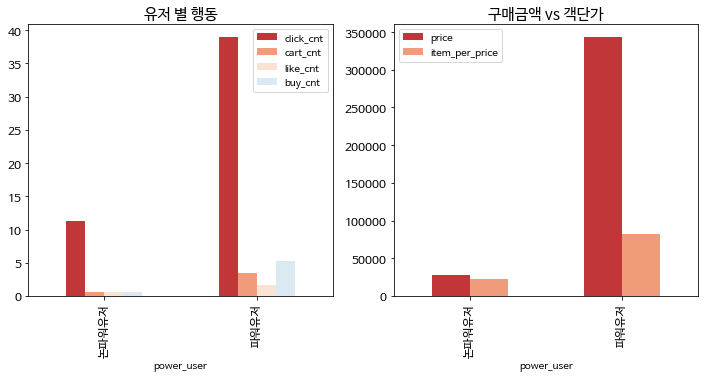

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))

action.iloc[:,:-2].plot.bar(fontsize=12, ax=ax[0])
ax[0].set_title('유저 별 행동', fontsize=15)

action.iloc[:,-2:].plot.bar(fontsize=12, ax=ax[1])
plt.title('구매금액 vs 객단가', fontsize=15)
plt.show()

**유저 별 행동**
- 전환 퍼널 5단계를 살펴봤을 때, 본 데이터로는 클릭 -> 장바구니/좋아요 -> 구매 순이라고 이해할 수 있으며, 넘어갈 수록 이탈률이 증가된다.
- 그러나, 위의 데이터를 살펴보면, 논파워유저는 그런 성향을 띄고 있지만, 파워유저는 클릭에서 장바구니/좋아요는 적어졌지만, 구매에서는 오히려 많아졌다.
- 즉, 파워유저는 클릭에서 장바구니/좋아요를 거치는 횟수보다, 즉시 구매 전환을 이루는 구매 패턴을 보이고 있다.


**구매금액 vs 객단가**
- **논파워유저**는 총 구매금액과 객단가에서 큰 차이를 보이지 않고, 금액이 크지 않다.
    - 즉,논파워유저는 높은 금액의 상품을 사지 않고, 많이 사지도 않는다.
    - 그러나, 논파워유저에는 구매자와 비구매자 고객들이 모두 존재하기에, 추후 구매자, 비구매자를 구분해서 살펴보아야 할 필요성이 있다.

- 반면에, **파워유저**는 비싼 물품을 많이 산다. 총구매금액과 객단가 또한 약 4배의 차이를 보이고 있다.

#### 구매자 & 비구매자 구분

In [ ]:
# 행동 패턴

action = np.round(user_total.pivot_table(index = ['power_user','buyer'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'cart_cnt':'인당장바구니수','like_cnt':'인당좋아요수', 'buy_cnt':'인당구매수','price':'총구매금액','item_per_price':'객단가'})

인당클릭수  인당장바구니수  인당좋아요수  인당구매수      총구매금액       객단가
power_user buyer                                                    
논파워유저      구매자     9.98     0.67    0.46   1.37   64619.22  51422.10
           비구매자   12.38     0.64    0.61   0.00       0.00      0.00
파워유저       구매자    38.93     3.40    1.62   5.32  343198.60  82557.92

- 논파워유저에서 구매자, 비구매자를 구분해서 보자.

**유저 별 행동**
- 놀라운 점은, **논파워유저는 비구매자가 인당 클릭수와 인당 좋아요수가 높고, 장바구니수 또한 구매자와 큰 차이가 없다.**
- 그러나, 실제로 구매를 하지는 않았다.
- 이는, **비구매자**들은, 마음에 들지 않아서 많은 상품들을 살펴보거나, 혹은 구매에 있어서 신중한 성향의 사람들이라고 추측을 할 수 있다.

**구매금액 vs 객단가**
- 이를 보면, **논파워유저**에서 비구매자들이 구매자들의 총구매금액과 객단가 평균을 많이 낮춘것을 알 수 있다

#### 플랫폼

In [ ]:
# 행동 패턴

action = np.round(user_total.pivot_table(index = ['power_user','platform'], values = ['buy_cnt','click_cnt','cart_cnt','like_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','cart_cnt','like_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'cart_cnt':'인당장바구니수','like_cnt':'인당좋아요수', 'buy_cnt':'인당구매수','price':'총구매금액','item_per_price':'객단가'})

인당클릭수  인당장바구니수  인당좋아요수  인당구매수      총구매금액       객단가
power_user platform                                                    
논파워유저      ANDROID    7.72     2.53    2.11   0.51   24335.24  19375.13
           IOS       12.62     0.00    0.00   0.61   28740.62  22867.53
파워유저       ANDROID   36.34    14.32    6.82   5.63  370184.79  86348.55
           IOS       39.74     0.02    0.01   5.23  334859.37  81386.55

**유저 별 행동**
- **플랫폼으로 분류했을 때, IOS 유저들을 보면, 장바구니수와 좋아요 수가 거의 0의 육박한 것을 확인 할 수 있다.**
- 이를 통해 확인해본 결과, **IOS 유저들은 6/6 ~ 7/31** 동안의 **장바구니 수와 좋아요 수는 거의 "0"**으로 채워져있다. => 불완전한 데이터




- 그러므로 현재부터, 전체적으로 데이터를 볼 때, **장바구니와 좋아요는 제외**를 해서 분석을 진행한다.


In [ ]:
# 구매 전환률 => 인당구매수 / 인당클릭수 (클릭 대비 구매의 비율)

action = np.round(user_total.pivot_table(index = ['power_user','platform'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action['구매전환률'] = np.round(action.iloc[:,1] / action.iloc[:,0] * 100, 2)
action = action[['click_cnt','buy_cnt','구매전환률','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'buy_cnt':'인당구매수','price':'총구매금액','item_per_price':'객단가'})

인당클릭수  인당구매수  구매전환률      총구매금액       객단가
power_user platform                                          
논파워유저      ANDROID    7.72   0.51   6.61   24335.24  19375.13
           IOS       12.62   0.61   4.83   28740.62  22867.53
파워유저       ANDROID   36.34   5.63  15.49  370184.79  86348.55
           IOS       39.74   5.23  13.16  334859.37  81386.55

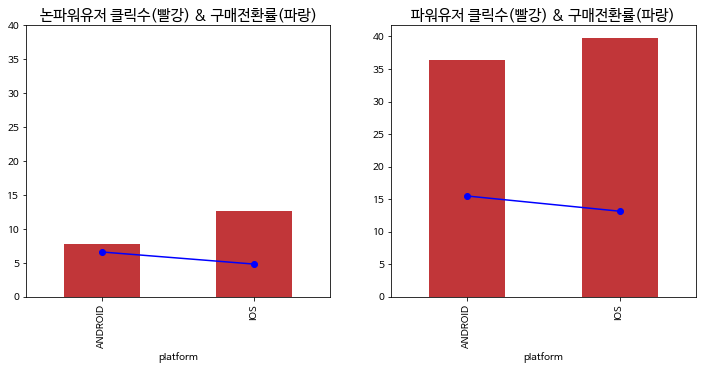

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['논파워유저', '구매전환률'].plot(ax=ax[0], color='b',marker='o')
action.loc['논파워유저', 'click_cnt'].plot.bar(ax=ax[0])
ax[0].set_title('논파워유저 클릭수(빨강) & 구매전환률(파랑)', fontsize=15)
ax[0].set_yticks([0,40], 10)

action.loc['파워유저', '구매전환률'].plot(ax=ax[1], color='b',marker='o')
action.loc['파워유저', 'click_cnt'].plot.bar(ax=ax[1])
ax[1].set_title('파워유저 클릭수(빨강) & 구매전환률(파랑)', fontsize=15)

plt.show()

- **구매전환률: 클릭 대비 구매의 비율**
- **구매전환률** 계산을 통해 플랫폼 대비, 파워/논파워 유저의 차이를 알아보고자 한다.
- **IOS와 안드로이드 구매 횟수는 큰 차이 없으나, 논파워->파워 구매 전환율은 안드로이드가 더 높은 비율로 올라감**

#### 성별

In [ ]:
# 구매 전환률 => 인당구매수 / 인당클릭수 (클릭 대비 구매의 비율)

action = np.round(user_total.pivot_table(index = ['power_user','gender'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action['구매전환률'] = np.round(action.iloc[:,1] / action.iloc[:,0] * 100, 2)
action = action[['click_cnt','buy_cnt','구매전환률','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'buy_cnt':'인당구매수','price':'총구매금액','item_per_price':'객단가'})

인당클릭수  인당구매수  구매전환률      총구매금액       객단가
power_user gender                                          
논파워유저      F       12.86   0.60   4.67   27604.96  21836.41
           M        8.47   0.63   7.44   31718.98  25610.06
파워유저       F       44.52   5.59  12.56  353781.11  79150.99
           M       25.87   4.78  18.48  329243.81  92508.61

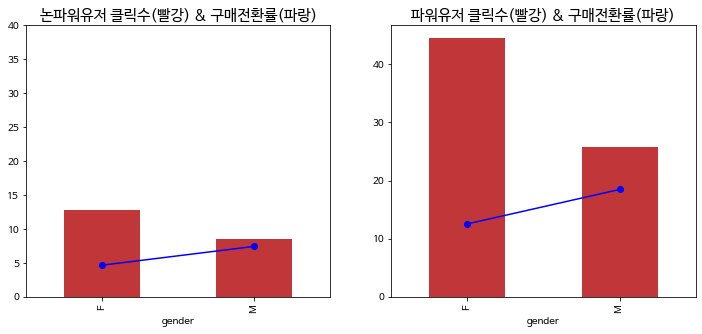

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['논파워유저', '구매전환률'].plot(ax=ax[0], color='b',marker='o')
action.loc['논파워유저', 'click_cnt'].plot.bar(ax=ax[0])
ax[0].set_title('논파워유저 클릭수(빨강) & 구매전환률(파랑)', fontsize=15)
ax[0].set_yticks([0,40], 10)

action.loc['파워유저', '구매전환률'].plot(ax=ax[1], color='b',marker='o')
action.loc['파워유저', 'click_cnt'].plot.bar(ax=ax[1])
ax[1].set_title('파워유저 클릭수(빨강) & 구매전환률(파랑)', fontsize=15)

plt.show()

- **구매전환률** 계산을 통해 성별 대비, 파워/논파워 유저의 차이를 알아보고자 한다.
- **파워유저/논파워유저** : 남성이 여성에 비해 클릭은 적어도, 구매 전환이 매우 높은 것을 알 수 있다.
- 파워유저가 클릭 횟수도 많지만, 구매 전환이 무려 3배 가량 높다.

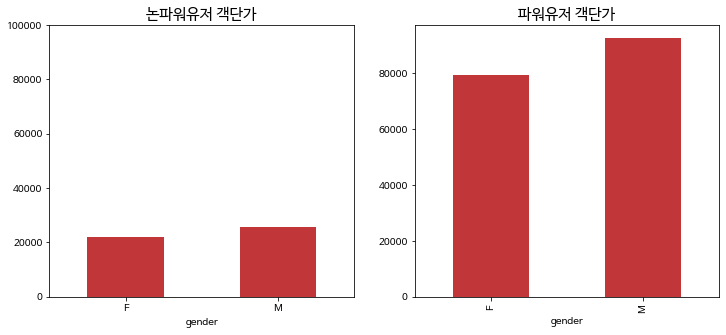

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['논파워유저', 'item_per_price'].plot.bar(ax=ax[0])
ax[0].set_title('논파워유저 객단가', fontsize=15)
ax[0].set_yticks([0,100000], 10)

action.loc['파워유저', 'item_per_price'].plot.bar(ax=ax[1])
ax[1].set_title('파워유저 객단가', fontsize=15)

plt.show()

- 파워유저, 논파워유저 구분없이, 남성이 대체적으로 여성보다 구매 금액이 약 17% 높음을 알 수 있다.

#### 연령

In [ ]:
user_ages = user_total[(user_total['나이대'] == '20대') |
                       (user_total['나이대'] == '30대') |
                       (user_total['나이대'] == '40대') |
                       (user_total['나이대'] == '50대') ]

action = np.round(user_ages.pivot_table(index = ['power_user','나이대'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action['구매전환률'] = np.round(action.iloc[:,1] / action.iloc[:,0] * 100, 2)
action = action[['click_cnt','buy_cnt','구매전환률','price','item_per_price']]
action.rename(columns = {'click_cnt' : '인당클릭수', 'buy_cnt':'인당구매수','price':'총구매금액','item_per_price':'객단가'})

인당클릭수  인당구매수  구매전환률      총구매금액       객단가
power_user 나이대                                          
논파워유저      20대  11.84   0.61   5.15   28854.01  22988.28
           30대  11.91   0.60   5.04   28796.15  22808.68
           40대  12.23   0.55   4.50   25480.13  20025.44
           50대  12.59   0.60   4.77   28562.54  22973.43
파워유저       20대  35.44   4.91  13.85  314214.88  80890.43
           30대  41.14   5.61  13.64  362492.21  82441.09
           40대  52.18   6.38  12.23  408542.77  82698.50
           50대  58.26   6.39  10.97  430147.55  87506.66

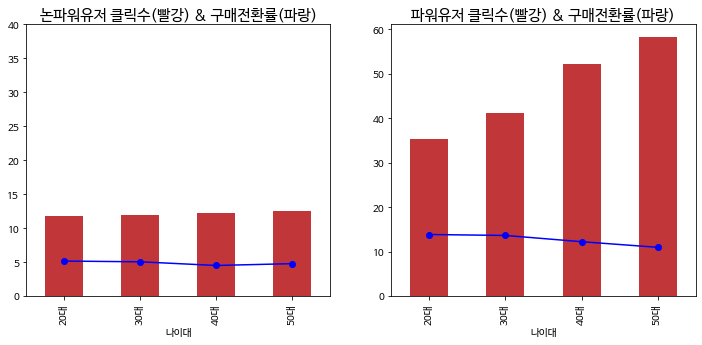

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['논파워유저', '구매전환률'].plot(ax=ax[0], color='b',marker='o')
action.loc['논파워유저', 'click_cnt'].plot.bar(ax=ax[0])
ax[0].set_title('논파워유저 클릭수(빨강) & 구매전환률(파랑)', fontsize=15)
ax[0].set_yticks([0,40], 10)

action.loc['파워유저', '구매전환률'].plot(ax=ax[1], color='b',marker='o')
action.loc['파워유저', 'click_cnt'].plot.bar(ax=ax[1])
ax[1].set_title('파워유저 클릭수(빨강) & 구매전환률(파랑)', fontsize=15)

plt.show()

- **구매전환률** 계산을 통해 연령대뵬 대비, 파워/논파워 유저의 차이를 알아보고자 한다.
- **논파워유저** : 클릭과 구매전환이 연령대별 큰 차이 없음
- **파워유저** : 연령이 높을 수록 클릭은 많아지나, 구매전환은 떨어지는 추이를 보임

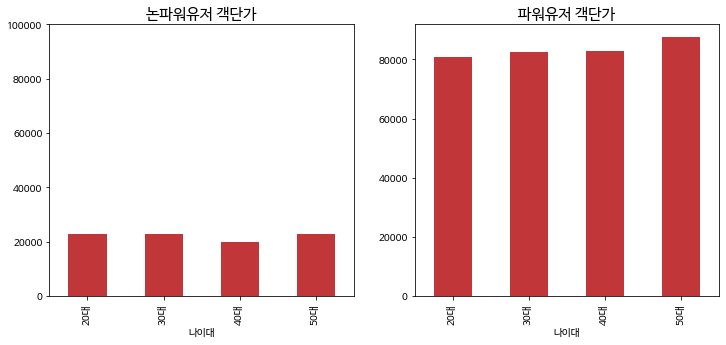

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['논파워유저', 'item_per_price'].plot.bar(ax=ax[0])
ax[0].set_title('논파워유저 객단가', fontsize=15)
ax[0].set_yticks([0,100000], 10)

action.loc['파워유저', 'item_per_price'].plot.bar(ax=ax[1])
ax[1].set_title('파워유저 객단가', fontsize=15)

plt.show()

- **논파워유저** : 나이대와 상관없이 큰 규칙이 없음
- **파워유저** : 나이가 높을수록, 객단가가 높아지는 성향을 보이고 있다.

### 시간대

In [ ]:
# 행동 패턴

action = np.round(user_total.pivot_table(index = ['power_user'], values = ['0시', '1시',
       '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시',
       '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시',
       '23시'] ,aggfunc='mean'), 2)
action.columns = ['0시', '1시',
       '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시',
       '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시',
       '23시']
action.sort_values(by='파워유저', axis=1, ascending=False)

,15시,14시,13시,0시,2시,3시,4시,12시,7시,6시,5시,1시,8시,9시,10시,11시,23시,22시,16시,21시,17시,20시,18시,19시
power_user,,,,,,,,,,,,,,,,,,,,,,,,
논파워유저,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00
파워유저,0.43,0.39,0.33,0.32,0.28,0.28,0.28,0.27,0.27,0.27,0.26,0.25,0.24,0.23,0.23,0.21,0.21,0.16,0.12,0.10,0.07,0.05,0.04,0.04


- **논파워유저** : 시간대와 구매수의 관계는 크게 없어 보인다.
- **파워유저** :
    - 13-15시에 제일 많이 구매하는 것으로 보인다.
    - 다음으로는, 새벽 0-4시 경에 많이 구매한다.

## 결론

- **파워유저:**
    - 성별: 현재는 29CM의 남성 사용자는 많지 않지만, 남성의 전환율이 높기 때문에 남성에 중점을 둔 브랜드/제품을 입점하는 것도 매우 좋아 보입니다.
    - 연령: 20-30대 사용자의 클릭 수는 적지만 전환율이 높습니다. 앱에서의 상품 추천은 이 사용자들의 취향과 잘 맞는 것으로 보입니다. 다만 이 분석에서는 이들의 이탈률을 파악하지 못한 점이 단점입니다.
    - 시간대: 파워유저들은 주로 13-15시와 0-4시에 액티브한데, 이 시간대 이전에 할인 쿠폰이나 구매 행동을 유도하는 마케팅 활동을 진행할 수 있습니다.

- **논파워유저:**
     - 구매자: 이 사용자 중 상당 부분은 한 번만 구매하며 평균 주문 금액이 높습니다. 이 사용자 그룹을 핵심 사용자로 전환시키기 위해 노력해야 합니다. 이들이 여러 번 구매하지 않는 이유는 다음과 같을 수 있습니다.
         - 배송비가 비싸다.
         - 원하는 상품이 없다.
         - 상품 가격이 너무 비싸다.
     - 이러한 점을 중점으로 전략을 수립하여 좋은 효과를 얻을 수 있을 것입니다.

     - 성별, 연령, 시간대를 통해 이러한 요소들이 논파워유저의 구매자 특성에 큰 영향을 미치지 않는 것으로 보입니다. 따라서 이들 사용자들은 아직 29CM을 사용하는 데 큰 관심을 가지고 있지 않은 것으로 판단됩니다.